In [1]:
import numpy as np
import cv2
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.figure
from matplotlib import mlab
import os
import json
import sys 
sys.path.append("../lib")
from utils.figs_base import *

In [2]:
numbersFile = "../Logs/faceNumbersPass2.pk"
visitedList = "../Logs/eyesExtracted.data"

In [3]:
lists = []
infile = open(numbersFile, 'r')
while 1:
    try:
        lists.append(pickle.load(infile))
    except (EOFError):
        break
infile.close()

In [5]:
PostID = np.zeros((len(lists),1) , dtype='i8')
totFrames = np.zeros((len(lists),1) , dtype='i8')
faceFrames = np.zeros((len(lists),1) , dtype='i8')
profileFrames = np.zeros((len(lists),1) , dtype='i8')
for i in range(len(lists)):
    log = lists[i].split(',')
    PostID[i] = int(log[0])
    totFrames[i] = int(log[1])
    faceFrames[i] = int(log[2])
    profileFrames[i] = int(log[3])

In [69]:
percentages = np.zeros((len(PostID),1))
frontalPercentages = np.zeros((len(PostID),1))
profilePercentages = np.zeros((len(PostID),1))
for i in range(len(PostID)):
    percentages[i] = float(max(faceFrames[i],profileFrames[i])/float(totFrames[i]))
    frontalPercentages[i] = float(faceFrames[i])/float(totFrames[i])
    profilePercentages[i] = float(profileFrames[i])/float(totFrames[i])

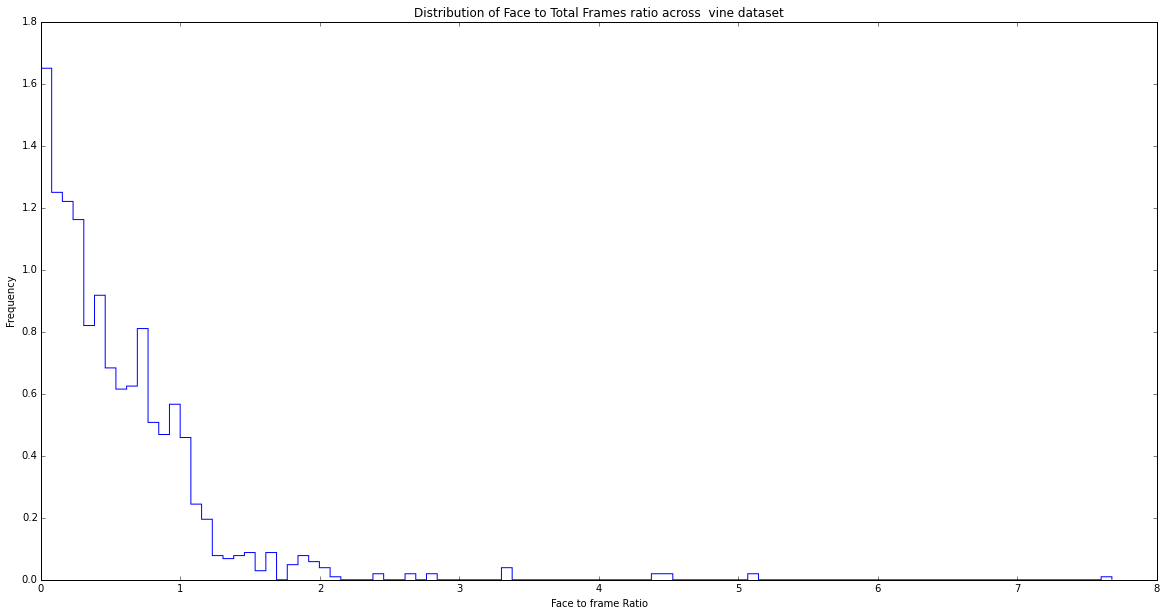

In [107]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(percentages , 100 , normed =1 , histtype='step' , cumulative=False)
plt.title("Distribution of Face to Total Frames ratio across  vine dataset")
plt.xlabel("Face to frame Ratio")
plt.ylabel("Frequency")
plt.show()


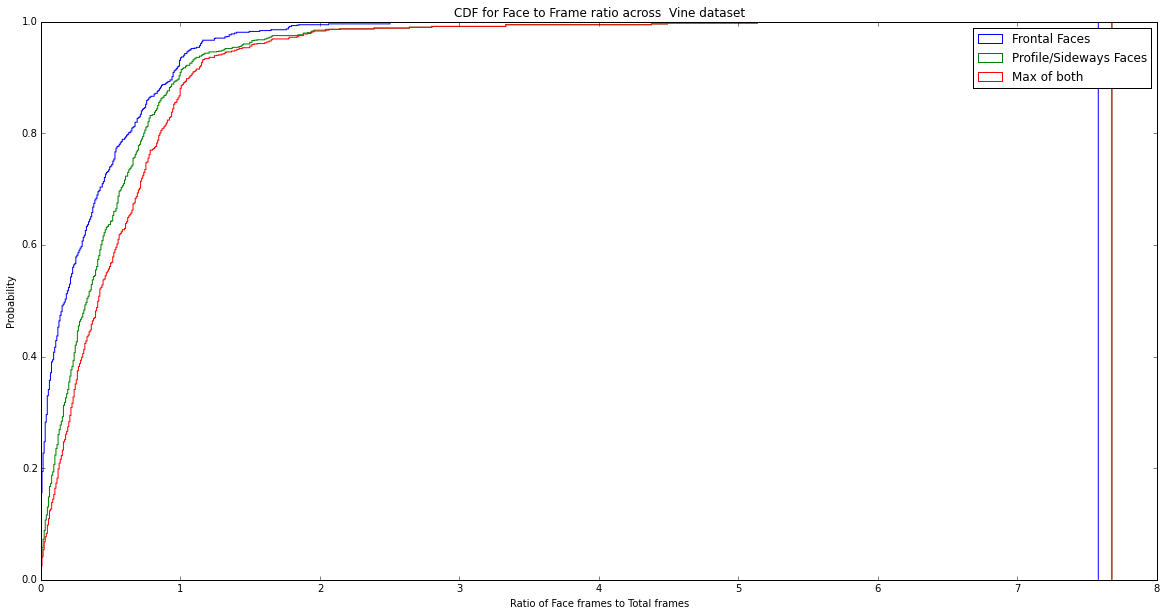

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(frontalPercentages, 1000, normed=1,histtype='step', cumulative=True)
plt.hist(profilePercentages, 1000, normed=1,histtype='step', cumulative=True)
plt.hist(percentages, 1000, normed=1,histtype='step', cumulative=True)
plt.title("CDF for Face to Frame ratio across  Vine dataset")
plt.xlabel("Ratio of Face frames to Total frames")
plt.ylabel("Probability")
plt.legend(['Frontal Faces', 'Profile/Sideways Faces' , 'Max of both'])
plt.show()


In [75]:
print np.mean(percentages)
print np.median(percentages)
print np.var(percentages)
print np.mean(frontalPercentages)
print np.median(frontalPercentages)
print np.var(frontalPercentages)
print np.mean(profilePercentages)
print np.median(profilePercentages)
print np.var(profilePercentages)

0.547439749921
0.416731855715
0.330723120127
0.338500835018
0.177051671733
0.198529064632
0.474496319977
0.331632653061
0.317314568949


In [76]:

def getVisited():
    visited = []
    f = open(visitedList, 'rb')
    visited = pickle.load(f)
    return visited


def walkLevel1Dir(root):
    count = 0
    dirList = []
    filesList = []
    for path, dirs, files in os.walk(root):
        if count > 0:
            return dirList , fileList
        dirList = dirs
        fileList = files
        count = count + 1


def getPopularFile(rootDir):
    f = open(rootDir + '/popular.json' ,'r')
    data = json.load(f)
    return data

    
    
def getPopularPosts(popular , loopThreshold):
    records = popular['data']['records']
    posts=[]
    for i in range (0 , len(records)):
        loopCount = records[i]['reposts']['count']
        if(loopCount > loopThreshold):
            posts.append(records[i])
    return posts

def getRecords(popular):
    records = popular['data']['records']
    return records

In [96]:
root = "../vinedata/Data/"
dirs,files = walkLevel1Dir(root)
visited = getVisited()
selectedPosts = []
allPosts = []


for d in dirs:
    if d in visited:
        dataRoot = root + d
        popular = getPopularFile(dataRoot)
        posts = getPopularPosts(popular , 5000)
        selectedPosts += posts
        rec = getRecords(popular)
        allPosts += rec
        #


In [98]:
print len(selectedPosts)
print len(allPosts)

158
1400


In [117]:
selectedIDs = np.zeros((len(selectedPosts),1),dtype='i8')
for i in range(len(selectedPosts)):
    selectedIDs[i] = int(selectedPosts[i]['postId'])

In [118]:
likeCount = np.zeros((len(allPosts),1))
repostCount = np.zeros((len(allPosts),1))
for i in range(len(allPosts)):
    likeCount[i] = allPosts[i]['likes']['count']
    repostCount[i] = allPosts[i]['reposts']['count']


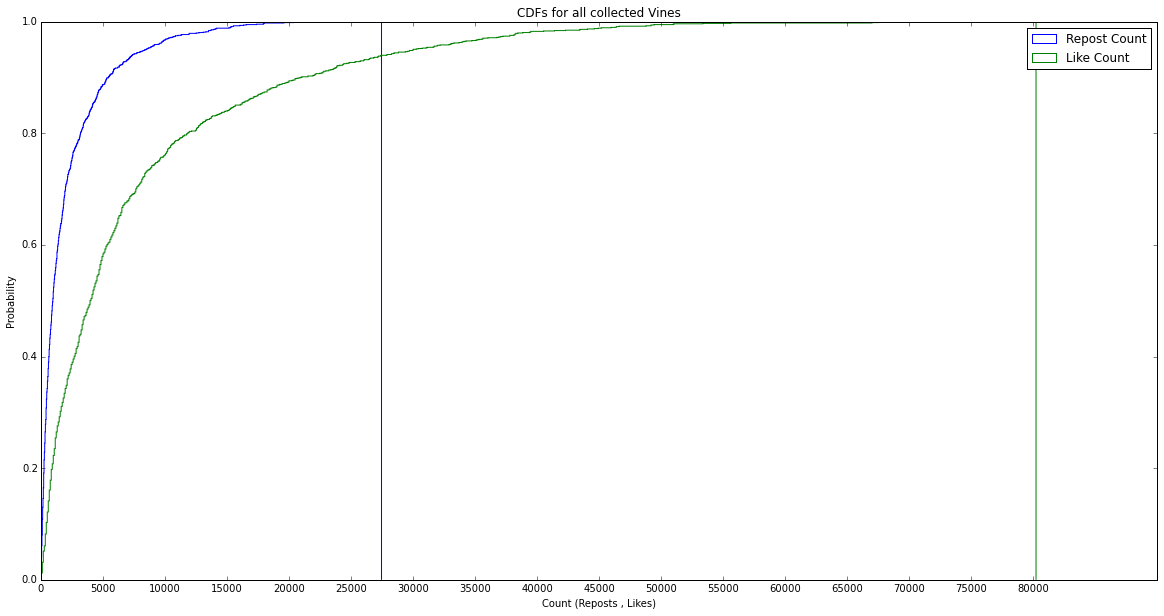

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(repostCount , 1000 , normed =1 , histtype='step' , cumulative=True)
plt.hist(likeCount , 1000 , normed =1 , histtype='step' , cumulative=True)
plt.xticks(np.arange(0, max(likeCount), 5000))
plt.title("CDFs for all collected Vines")
plt.xlabel("Count (Reposts , Likes)")
plt.ylabel("Probability")
plt.legend(['Repost Count', 'Like Count'])
plt.show()

In [120]:
print np.mean(likeCount)
print np.median(likeCount)
print np.mean(repostCount)
print np.median(repostCount)
print np.mean(loopCount)
print np.median(loopCount)

7694.29785714
4021.5
2100.555
969.5
280097.84
144171.0


In [121]:
indices = np.arange(PostID.shape[0])[np.in1d(PostID, selectedIDs)]

In [122]:
print len(selectedPosts)
print len(indices)
print PostID.shape
print selectedIDs.shape

158
129
(1334, 1)
(158, 1)


In [123]:
print max(indices)

1248


In [124]:

selFacePercentages = np.zeros((len(indices),1))
selFrontalPercentages = np.zeros((len(indices),1))
selProfilePercentages = np.zeros((len(indices),1))

for i in range(len(indices)):
    selPercentages[i] = float(max(faceFrames[i],profileFrames[i]))/float(totFrames[indices[i]])
    selProfilePercentages[i] = float(profileFrames[i])/float(totFrames[indices[i]])
    selFrontalPercentages[i] = float(faceFrames[i])/float(totFrames[indices[i]])

selRepost = np.zeros((len(indices),1))
selLikes = np.zeros((len(indices),1))

for i in range(len(indices)):
    selRepost[i] = allPosts[indices[i]]['reposts']['count']
    selLikes[i] = allPosts[indices[i]]['likes']['count']

In [125]:
print min(selRepost)
print min(selLikes)


[ 9.]
[ 44.]


In [126]:
likesNormed = selLikes / selLikes.max(axis=0)
repostNormed = selRepost / selRepost.max(axis=0)

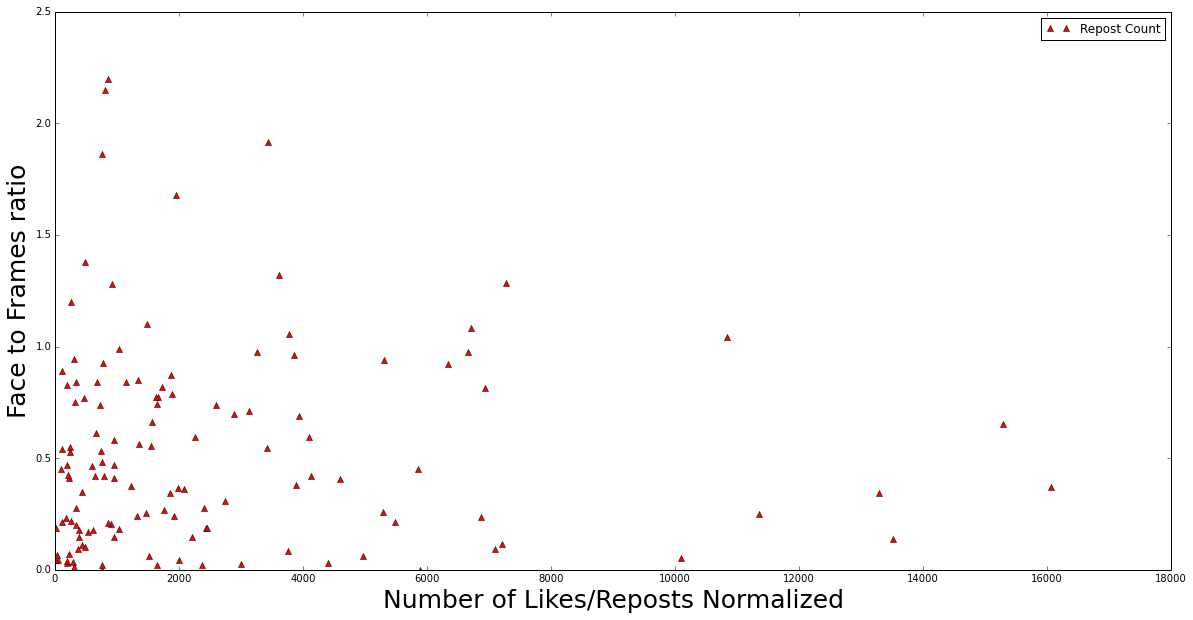

In [133]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
#plt.plot(likesNormed , selPercentages,'*g' )
plt.plot(selRepost , selPercentages , '^r' )

plt.xlabel('Number of Likes/Reposts Normalized',fontsize = 25)
plt.ylabel('Face to Frames ratio', fontsize = 25)
plt.legend(['Repost Count'])
plt.show()

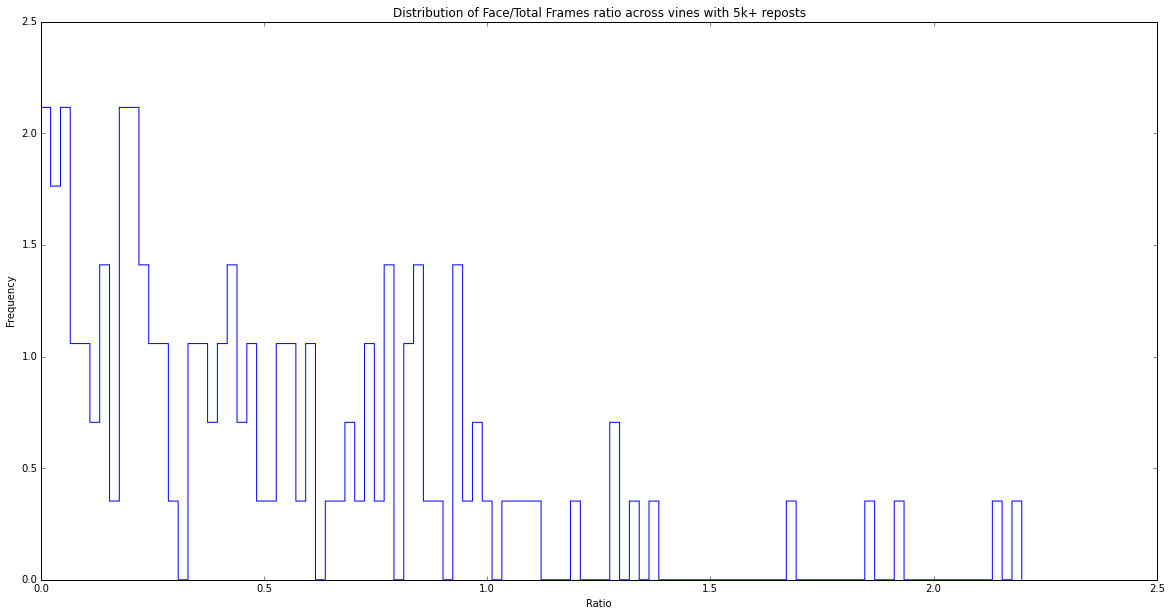

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(selPercentages , 100 , normed =1 , histtype='step' , cumulative=False)
plt.title("Distribution of Face/Total Frames ratio across vines with 5k+ reposts")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.show()


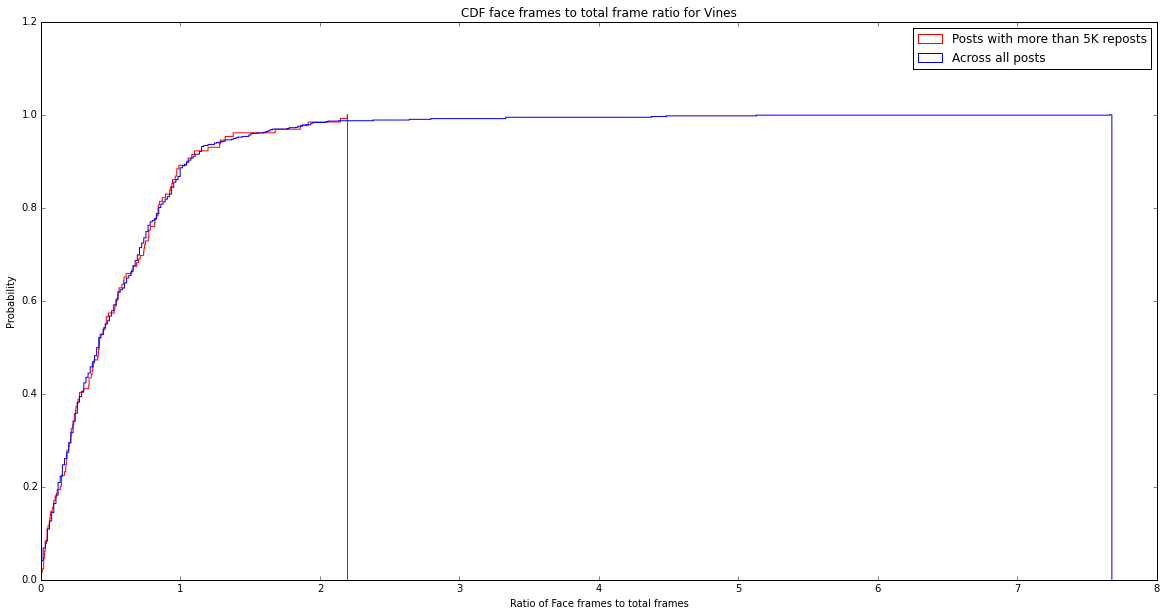

In [131]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
hist1 = plt.hist(selPercentages, 1000, normed=1,histtype='step', cumulative=True ,color='r')
hist2 = plt.hist(percentages, 500, normed=1,histtype='step', cumulative=True , color='b')

# y = mlab.normpdf(bins, percentages).cumsum()
# y /= y[-1]
#plt.plot(bins, n, 'k--', linewidth=1.5)
plt.title("CDF face frames to total frame ratio for Vines")
plt.xlabel("Ratio of Face frames to total frames")
plt.ylabel("Probability")
plt.legend(['Posts with more than 5K reposts', 'Across all posts'])
plt.show()

In [132]:
print np.mean(selPercentages)
print np.median(selPercentages)
print np.var(selPercentages)

0.521840462505
0.418367346939
0.204601225247
